<a href="https://colab.research.google.com/github/hastman/03-MAIR-Algoritmos-de-Optimizacion/blob/master/Angel_Lopez_Gomez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2 de Algoritmos de Optimización - Ángel López Gómez 
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nCwgZdfWTJDnVKVY0u-cLg0UxilOJLQm)


In [0]:
from functools import wraps
from time import time
def duration(f):
    @wraps(f)  
    def timing(*args, **kwargs):
        init = time()
        fun_result = f(*args, **kwargs)
        end = time()
        print('Elapsed time %d ms' %((end - init)*1000))
        return fun_result
    return timing

## Programacióm dinámica

In [4]:
TARIFAS=[[0,5,4,3,999,999,999],
        [999,0,999,2,3,999,1],
        [999,999,0,1,999,4,10],
        [999,999,999,0,5,6,9],
        [999,999,999,999,0,999,4],
        [999,999,999,999,999,0,3],
        [999,999,999,999,999,999,0]]

def Precios (TARIFAS):  
  N= len(TARIFAS[0])  
  PRECIOS = [[9999]*N for i in [9999]*N ]
  RUTA=[[""]*N for i in [""]*N]
  
  for i in range(N-1):
      for j in range(i+1,N):
        MIN=TARIFAS[i][j]
        RUTA[i][j]=i        
        for k in range (i,j):
          if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = PRECIOS[i][k] + TARIFAS[k][j]
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
  return PRECIOS, RUTA

def calcular_ruta(RUTA, desde, hasta):
  if desde==hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + '-' + str(RUTA[desde][hasta])

priceByRoute = Precios(TARIFAS)  
calculated_route = calcular_ruta(priceByRoute[1],1,5)
print("Best route {0}".format(calculated_route))
                                                                           


Best route 1-1-3


## Asignacion de tareas. Ramificacion y poda


In [0]:
COSTES_TEST=[[11,12,18,40],
       [14,15,13,22],
       [11,17,19,23],
       [17,14,20,28]]

def valor(S,COSTES):
    VALOR=0
    for i in range(len(S)):
      VALOR+= COSTES[S[i]][i]
      
    return VALOR


### Fuerza Bruta


In [25]:
import itertools

@duration
def fuerza_bruta(COSTES):
    mejor_valor=10e10
    mejor_solucion= ''
    
    for S in list(itertools.permutations(range(len(COSTES)))):
      valor_tmp = valor(S, COSTES)
      if valor_tmp < mejor_valor:
        mejor_solucion=S
        mejor_valor=valor_tmp
        
    print("La mejor solucion es :" ,mejor_solucion)
    
    
fuerza_bruta(COSTES_TEST)


La mejor solucion es : (0, 3, 1, 2)
Elapsed time 0 ms


### Funcion para estimar un coste inferior para una solucion parcial

In [0]:
#Coste inferior para soluciones parciales
#(1,3) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1
def CI(S,COSTES):
  VALOR=0
  #Valores Establecidos
  for i in range(len(S)):
    VALOR+= COSTES[i][S[i]]
    
 #Estimacion
  for i in range(len(COSTES)):
    if i not in S:
      VALOR+= min([COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR    

### Funcion para crear hijos





In [0]:
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s': NODO+(i,)})        
  return HIJOS

### Funcion para ramificar

In [46]:
@duration
def ramificacion_y_poda(COSTES):
  DIMENSION= len(COSTES)
  MEJOR_SOLUCION= tuple(i for i in range(DIMENSION))  
  CotaSup= valor(MEJOR_SOLUCION,COSTES)  
  
  NODOS=[]
  NODOS.append({'s':(), 'ci': CI((), COSTES) })
  iteracion=0  
  
  while (len(NODOS)>0):
    iteracion+=1
    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']    
    #Se generan los hijos    
    HIJOS= [{'s':x['s'], 'ci': CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]     
    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s'])==DIMENSION]    
    if len(NODO_FINAL)>0:      
      if NODO_FINAL[0]['ci']< CotaSup:
        CotaSup=NODO_FINAL[0]['ci']
        MEJOR_SOLUCION=NODO_FINAL       
    
    #poda    
    HIJOS=[x for x in HIJOS if x['ci']<CotaSup]        
    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo expandido
    NODOS= [ x for x in NODOS if x['s'] != nodo_prometedor]
    
  print('La mejor solucion es: {0} en {1} iteraciones para dimension {2}'.format(MEJOR_SOLUCION,iteracion,DIMENSION))
  
  

ramificacion_y_poda(COSTES_TEST)
  

La mejor solucion es: [{'s': (0, 2, 3, 1), 'ci': 61}] en 14 iteraciones para dimension 4
Elapsed time 0 ms


### Análisis Ramificación y poda

La complejidad del algoritmo por fuerza bruta viene dada por la función `itertools.permutations` que es `O(n!)`. Lo que nos indica que este algoritmo dejara de funcionar con valores medianamente grandes, que probaremos a continuación.


In [11]:
from random import randint
def matrix_generator(dimension):
  matrix = []
  for _ in range(dimension):
    row = []
    for _ in range(dimension):
      row.append(randint(10, 50))
    matrix.append(row)
  return matrix


matrix_five_dimension =matrix_generator(5)
matrix_six_dimension=matrix_generator(6)
matrix_seven_dimension=matrix_generator(7)
matrix_eight_dimension=matrix_generator(8)


print("With 5 dimensions")
fuerza_bruta(matrix_five_dimension)
print("With 6 dimensions")
fuerza_bruta(matrix_six_dimension)
print("With 7 dimensions")
fuerza_bruta(matrix_seven_dimension)
print("With 8 dimensions")
fuerza_bruta(matrix_eight_dimension)
print("With 10 dimensions ")
fuerza_bruta(matrix_ten_dimension)

With 5 dimensions
La mejor solucion es : (3, 2, 1, 4, 0)
Elapsed time 0 ms
With 6 dimensions
La mejor solucion es : (2, 5, 4, 0, 3, 1)
Elapsed time 0 ms
With 7 dimensions
La mejor solucion es : (0, 1, 5, 4, 3, 6, 2)
Elapsed time 7 ms
With 8 dimensions
La mejor solucion es : (6, 5, 3, 1, 4, 2, 0, 7)
Elapsed time 47 ms
With 10 dimensions 
La mejor solucion es : (0, 8, 5, 3, 4, 6, 1, 7, 9, 2)
Elapsed time 4763 ms


El algoritmo de fuerza bruta comienza a ser de poca utilidad en la dimensión `10`, debido a las operaciones exponeciales que se realizan para las combinaciones.

Comprobaremos ahora los límites del algoritmo de ramificación y poda, comenzando por donde el anterior deja de ser útil.



In [51]:
matrix_ten_dimension=matrix_generator(10)
matrix_twelve_dimension=matrix_generator(12)
matrix_fifteen_dimension=matrix_generator(15)
matrix_sixteen_dimension=matrix_generator(16)

print("With 10 dimensions ")
ramificacion_y_poda(matrix_ten_dimension)
print("With 12 dimensions ")
ramificacion_y_poda(matrix_twelve_dimension)
print("With 15 dimensions ")
ramificacion_y_poda(matrix_fifteen_dimension)
print("With 16 dimensions ")
ramificacion_y_poda(matrix_sixteen_dimension)



With 10 dimensions 
La mejor solucion es: [{'s': (9, 7, 0, 5, 4, 2, 8, 1, 3, 6), 'ci': 162}] en 1143 iteraciones para dimension 10
Elapsed time 172 ms
With 12 dimensions 
La mejor solucion es: [{'s': (0, 8, 6, 10, 2, 7, 5, 1, 4, 11, 9, 3), 'ci': 154}] en 1035 iteraciones para dimension 12
Elapsed time 174 ms
With 15 dimensions 
La mejor solucion es: [{'s': (10, 12, 7, 11, 0, 2, 8, 3, 5, 9, 6, 1, 14, 4, 13), 'ci': 182}] en 2217 iteraciones para dimension 15
Elapsed time 725 ms
With 16 dimensions 
La mejor solucion es: [{'s': (1, 4, 13, 15, 0, 2, 8, 10, 9, 6, 12, 5, 14, 3, 7, 11), 'ci': 200}] en 17707 iteraciones para dimension 16
Elapsed time 35149 ms


El algoritmo de poda comienza a dar tiempos altos a partir de la dimesion `15` si bien el algoritmo no consume todos los recursos del cuaderno, al contrario del algoritmo fuerza bruta, que para valores mayores a `10` consumía todos los recursos del cuaderno.

## Descenso del gradiente

Punto Inicial [-1.8401635552761642, -0.6879831930885638]


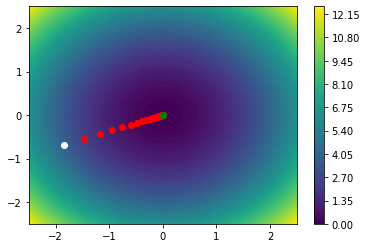

Solucion [-6.454311492924641e-49, -2.413077803523885e-49] 4.748108133355877e-97


In [64]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f = lambda x : x[0]**2+x[1]**2
df = lambda x : [2*x[0],2*x[1]]


resolucion=100
rango = 2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
P=[random.uniform(-2,2),random.uniform(-2,2)]
print("Punto Inicial {0}".format(P))
plt.plot(P[0],P[1],"o",c="white")
plt.colorbar()
TA =.1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0],P[1]-TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion {0} {1}".format(P,f(P)))

Punto Inicial [-1.382032799606776, -0.047814666697474806]


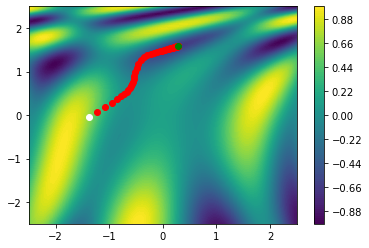

Solucion [0.2902910349495959, 1.588434714236159] -0.6569867369208678


In [67]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f_1 = lambda x: np.sin(1/2*x[0]**2-1/4*x[1]**2+3)*np.cos(2*x[0]+1-np.e**x[1])
def df_1(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it,th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f_1(T)-f_1(PUNTO)) / h
  return grad

resolucion=100
rango = 2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f_1([x,y])

plt.contourf(X,Y,Z,resolucion)
P=[random.uniform(-2,2),random.uniform(-2,2)]
print("Punto Inicial {0}".format(P))
plt.plot(P[0],P[1],"o",c="white")
plt.colorbar()
TA =.1
for _ in range(500):
  grad = df_1(P)
  P[0],P[1] = P[0] - TA*grad[0],P[1]-TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion {0} {1}".format(P,f_1(P)))